In [1]:
!pip install pulp

You should consider upgrading via the 'C:\Users\RAYAN\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

## 5 Variables (Team A, B, C, D, E)

In [27]:
model = LpProblem(name="Recruitment Optimization for 5 Teams", sense=LpMaximize)

# Teams
x1 = LpVariable(name="A", lowBound=1, upBound = 10)
x2 = LpVariable(name="B", lowBound=1, upBound = 10)
x3 = LpVariable(name="C", lowBound=1, upBound = 10)
x4 = LpVariable(name="D", lowBound=1, upBound = 10)
x5 = LpVariable(name="E", lowBound=1, upBound = 10)

# constraints
model += (0.737*x1 + 0.715*x2 + 0.771*x3 +  0.756*x4 + 0.705*x5 <=20, "health constraint")
model += (0.755*x1 + 0.755*x2 + 0.744*x3 +  0.743*x4 + 0.755*x5 >=20, "commitment constraint")
model += (0.723*x1 + 0.739*x2 + 0.747*x3 +  0.742*x4 + 0.753*x5 <=32, "strength constraint")

#objective function
obj_func = 1.109 * x1 + 1.27*x2 + 0.926*x3 + 0.778*x4 + 1.085*x5
model += obj_func

print(model)

Recruitment_Optimization_for_5_Teams:
MAXIMIZE
1.109*A + 1.27*B + 0.926*C + 0.778*D + 1.085*E + 0.0
SUBJECT TO
health_constraint: 0.737 A + 0.715 B + 0.771 C + 0.756 D + 0.705 E <= 20

commitment_constraint: 0.755 A + 0.755 B + 0.744 C + 0.743 D + 0.755 E >= 20

strength_constraint: 0.723 A + 0.739 B + 0.747 C + 0.742 D + 0.753 E <= 32

VARIABLES
1 <= A <= 10 Continuous
1 <= B <= 10 Continuous
1 <= C <= 10 Continuous
1 <= D <= 10 Continuous
1 <= E <= 10 Continuous



In [28]:
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")

status: 1, Optimal
objective: 31.683792360999995
A: 5.797829
B: 10.0
C: 1.0
D: 1.0
E: 10.0


## 2 Variables (Team A, B)

In [29]:
model = LpProblem(name= "Recruitment Optimization for 2 Teams", sense=LpMaximize)

x1 = LpVariable(name="A", lowBound=1, upBound = 30)
x2 = LpVariable(name="B", lowBound=1, upBound = 30)

model += (0.737*x1 + 0.715*x2  <=30, "health constraint")
model += (0.755*x1 + 0.755*x2  >=20, "commitment constraint")
model += (0.723*x1 + 0.739*x2 <=32, "strength constraint")

obj_func = 1.109 * x1 + 1.27*x2
model += obj_func

print(model)

Recruitment_Optimization_for_2_Teams:
MAXIMIZE
1.109*A + 1.27*B + 0.0
SUBJECT TO
health_constraint: 0.737 A + 0.715 B <= 30

commitment_constraint: 0.755 A + 0.755 B >= 20

strength_constraint: 0.723 A + 0.739 B <= 32

VARIABLES
1 <= A <= 30 Continuous
1 <= B <= 30 Continuous



In [30]:
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")

status: 1, Optimal
objective: 50.965603265
A: 11.601085
B: 30.0


## Visualization

Text(0, 0.5, 'x2')

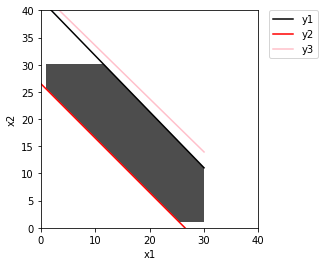

In [31]:
import matplotlib.pyplot as plt
import numpy as np

d = np.linspace(1,30,300)
x,y = np.meshgrid(d,d)

plt.imshow( ((0.737*x + 0.715*y  <=30) 
             & (0.755*x + 0.755*y  >=20) 
             & (0.723*x + 0.739*y <=32)).astype(int) , 
             extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.7)


x = np.linspace(0, 30, 2000)
y1 = (30 - 0.737*x)/0.715
y3 = (32 - 0.723*x)/0.739
y2 = (20- 0.755*x)/ 0.755

plt.plot(x, y1, label='y1', color = 'black')
plt.plot(x, y2, label='y2', color = 'red')
plt.plot(x, y3, label='y3', color = 'pink')

plt.xlim(0,40)
plt.ylim(0,40)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x1')
plt.ylabel('x2')

In [58]:
x = 30
y1 = (30 - 0.737*x)/0.715
c1 = [30,y1]
print(c1)

[30, 11.034965034965037]


In [59]:
x = 1
y2 = (20- 0.755*x)/ 0.755
c2 = [1,y2]
print(c2)

[1, 25.490066225165563]


In [60]:
c3 = [30,1]
c4 = [1,30]

In [61]:
x = (20 - 0.755*y2) / 0.755
y2 = 1
c5 = [x,1]
print(c5)

[0.9999999999999987, 1]


In [62]:
x = (30-0.715*y1)/0.737
y1 = 30
c6 = [x,30]
print(c6)

[30.0, 30]


In [63]:
c = c1,c2,c3,c4,c5,c6 
print(c)

([30, 11.034965034965037], [1, 25.490066225165563], [30, 1], [1, 30], [0.9999999999999987, 1], [30.0, 30])


In [64]:
maximum = -float("inf")

for i in range(len(c)):
    x1 =c[i][0]
    x2 = c[i][1]
    print(type(x1))
    obj_func = 1.109 * x1 + 1.27*x2
    if obj_func> maximum:
        maximum = obj_func
        x1_max = x1
        x2_max = x2

print("optimal performance: ",maximum,"\n","optimal x1: ", x1_max,'\n','optimal x2: ',x2_max)       

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
optimal performance:  71.37 
 optimal x1:  30.0 
 optimal x2:  30
